Instalaciones

In [1]:
#!pip install xgboost

In [2]:
#!pip install lightgbm

In [3]:
#!conda config --add channels conda-forge
#!conda install catboost -y

In [4]:
#!pip install scikit-plot

## Prediciendo quiebra de empresas

En esta práctica guiada vamos a trabajar en predecir la quiebra de empresas en Polonia. La información fue obtenida del Servicio de Información de Mercados Emergentes (EMIS por sus siglas en inglés), que es una base de datos que contiene información de los mercados emergentes alrededor del mundo. Las compañías en bancarrota fueron analizadas en el período 2000-2012, mientras que las que continuan operando se evaluaron desde 2007 a 2013.

En este caso sólo vamos a trabajar con el tercer año de los disponibles. Se puede consultar la página de UCI en donde se encuentra alojado <a href='https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data'> aqui </a> 

El dataset empleado tiene datos de las empresas y su estatus tres años después.

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("../Data/3year.csv")

In [7]:
df.head()

,Unnamed: 0,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [8]:
df = df.drop("Unnamed: 0", axis = 1)

Acá hay una descripción de los atributos

X1 net profit / total assets

X2 total liabilities / total assets

X3 working capital / total assets

X4 current assets / short-term liabilities

X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365

X6 retained earnings / total assets

X7 EBIT / total assets

X8 book value of equity / total liabilities

X9 sales / total assets

X10 equity / total assets

X11 (gross profit + extraordinary items + financial expenses) / total assets

X12 gross profit / short-term liabilities

X13 (gross profit + depreciation) / sales

X14 (gross profit + interest) / total assets

X15 (total liabilities * 365) / (gross profit + depreciation)

X16 (gross profit + depreciation) / total liabilities

X17 total assets / total liabilities

X18 gross profit / total assets

X19 gross profit / sales

X20 (inventory * 365) / sales

X21 sales (n) / sales (n-1)

X22 profit on operating activities / total assets

X23 net profit / sales

X24 gross profit (in 3 years) / total assets

X25 (equity - share capital) / total assets

X26 (net profit + depreciation) / total liabilities

X27 profit on operating activities / financial expenses

X28 working capital / fixed assets

X29 logarithm of total assets

X30 (total liabilities - cash) / sales

X31 (gross profit + interest) / sales

X32 (current liabilities * 365) / cost of products sold

X33 operating expenses / short-term liabilities

X34 operating expenses / total liabilities

X35 profit on sales / total assets

X36 total sales / total assets

X37 (current assets - inventories) / long-term liabilities

X38 constant capital / total assets

X39 profit on sales / sales

X40 (current assets - inventory - receivables) / short-term liabilities

X41 total liabilities / ((profit on operating activities + depreciation) * (12/365))

X42 profit on operating activities / sales

X43 rotation receivables + inventory turnover in days

X44 (receivables * 365) / sales

X45 net profit / inventory

X46 (current assets - inventory) / short-term liabilities

X47 (inventory * 365) / cost of products sold

X48 EBITDA (profit on operating activities - depreciation) / total assets

X49 EBITDA (profit on operating activities - depreciation) / sales

X50 current assets / total liabilities

X51 short-term liabilities / total assets

X52 (short-term liabilities * 365) / cost of products sold)

X53 equity / fixed assets

X54 constant capital / fixed assets

X55 working capital

X56 (sales - cost of products sold) / sales

X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)

X58 total costs /total sales

X59 long-term liabilities / equity

X60 sales / inventory

X61 sales / receivables

X62 (short-term liabilities *365) / sales

X63 sales / short-term liabilities

X64 sales / fixed assets

Transforme la clase en 0 y 1, para ello puede emplear LabelEncoder

In [9]:
y = df["class"]
X = df.drop("class", axis = 1)

In [10]:
print("el dataset tiene ", X.shape[0], " filas y ", X.shape[1], " columnas")

el dataset tiene  10503  filas y  64  columnas


In [11]:
from sklearn.preprocessing import LabelEncoder

Usamos LabelEncoder para transformar la clase en un array de 0 y 1

In [12]:
encoder = LabelEncoder()

In [13]:
y.head()

0    b'0'
1    b'0'
2    b'0'
3    b'0'
4    b'0'
Name: class, dtype: object

In [14]:
y = encoder.fit_transform(y)

In [15]:
y

array([0, 0, 0, ..., 1, 1, 1])

Hagamos un split en train y test.

In [16]:
from sklearn.model_selection import train_test_split

Con la información de train vamos a realizar la búsqueda de hiperparámetros y ajustar el mejor modelo.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

## Knn - Benchmark

Comencemos probando Knn, que será nuestro benchmark

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import time
import numpy as np
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [19]:
model_knn = KNeighborsClassifier()

In [20]:
params = {"n_neighbors":list(range(3,8))}

In [21]:
knn = GridSearchCV(model_knn, params, verbose= True)

Imputamos los NA con 0

In [22]:
X_train_na = X_train.fillna(0)
X_test_na = X_test.fillna(0)

In [23]:
stds = StandardScaler()

In [24]:
X_train_knn = stds.fit_transform(X_train_na)

In [25]:
X_test_knn = stds.transform(X_test_na)

In [26]:
start = time.time()
knn.fit(X_train_knn, y_train)
end = time.time()
print("La búsqueda con knn llevó: ", end - start, " segundos")

C:\Users\mbeati\AppData\Local\Continuum\anaconda3\envs\dsdh2\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits
La búsqueda con knn llevó:  23.825992107391357  segundos


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   23.6s finished


In [27]:
knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [28]:
y_predicted_knn = knn.predict_proba(X_test_knn)
knn_auc = roc_auc_score(y_test, y_predicted_knn[:,1])
print("El valor del AUC es: ", knn_auc)

El valor del AUC es:  0.6136149374116169


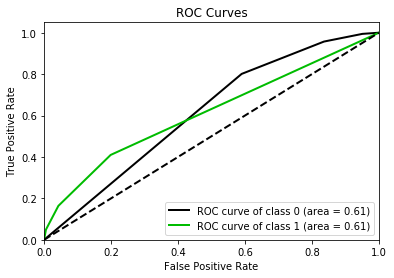

In [29]:
%matplotlib inline
plot_roc(y_test,y_predicted_knn, plot_micro = False, plot_macro= False);

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model_rf = RandomForestClassifier()

In [32]:
import scipy.stats as st

A RandomizedSearchCV los hiperparámetros se los podemos pasar como una lista o también como una distribución de scipy.

In [33]:
params = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 12)     # Maximum tree depth for base learners.
}

In [34]:
rf = RandomizedSearchCV(model_rf,params, n_iter=25, verbose= True)

In [35]:
start = time.time()
rf.fit(X_train_na,y_train)
end = time.time()
print("La búsqueda con Random Forest llevó: ", end - start, " segundos")

C:\Users\mbeati\AppData\Local\Continuum\anaconda3\envs\dsdh2\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   46.8s finished


La búsqueda con Random Forest llevó:  47.36099982261658  segundos


In [36]:
rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=31,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
y_predicted_rf = rf.predict_proba(X_test_na)

In [38]:
rf_auc = roc_auc_score(y_test,y_predicted_rf[:,1])
print("El valor del AUC es: ", rf_auc)

El valor del AUC es:  0.7861749070339914


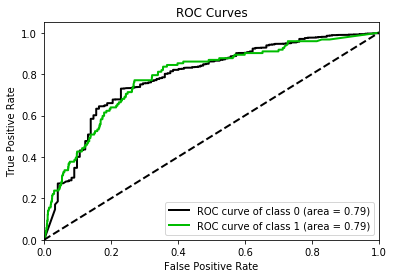

In [39]:
%matplotlib inline
plot_roc(y_test,y_predicted_rf, plot_micro = False, plot_macro= False);

## Xgboost

Vamos a importar el clasificador XGBoost del módulo xgboost.sklearn que nos provee clases y métodos aceptados por la API de sklearn. La clase que contiene este clasificador se llama XGBClassifier

In [40]:
from xgboost.sklearn import XGBClassifier

In [41]:
model_xg = XGBClassifier(n_jobs=-1)

Podemos partir del siguiente conjunto de hiperparámetros, que serán empleados también luego.

In [42]:
one_to_left = st.beta(10, 1) # Esta distribución nos dará valores entre 0 y 1 mayormente cercanos a 1

In [43]:
params = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)
    "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
    'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
    "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
}

Se puede consultar los parámetros <a = "http://xgboost.readthedocs.io/en/latest/python/python_api.html"> aquí </a> y <a = "https://github.com/dmlc/xgboost/blob/master/doc/parameter.md"> aquí </a>

Realizamos la búsqueda de hiperparámetrosRandomiezSearchCV con 25 iteraciones

In [44]:
xgb = RandomizedSearchCV(model_xg,params, n_iter=25, verbose= True)

Busco el mejor set de hiperparámetros y calculamos el tiempo

¿Es necesario normalizar los features antes de aplicar XGBoost?

In [45]:
start = time.time()
xgb.fit(X_train,y_train)
end = time.time()
print("La búsqueda con XGBoost llevó: ", end - start, " segundos")

C:\Users\mbeati\AppData\Local\Continuum\anaconda3\envs\dsdh2\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   48.0s finished


La búsqueda con XGBoost llevó:  49.61499261856079  segundos


In [46]:
y_predicted_xgb = xgb.predict_proba(X_test)

In [47]:
y_predicted_xgb[:,0].shape

(2626,)

In [48]:
xgb_auc = roc_auc_score(y_test,y_predicted_xgb[:,1])
print("El valor del AUC es: ", xgb_auc)

El valor del AUC es:  0.9201081548211386


Graficamos la curva ROC por clase

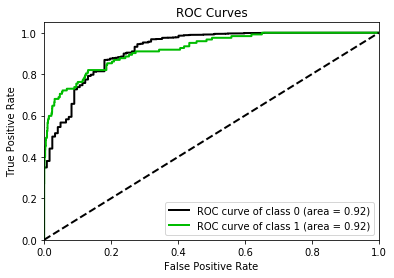

In [49]:
plot_roc(y_test,y_predicted_xgb, plot_micro = False, plot_macro= False);

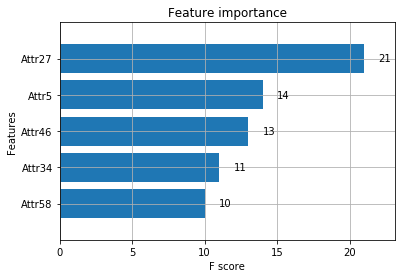

In [50]:
from xgboost import plot_importance
plot_importance(xgb.best_estimator_, height = 0.8,max_num_features=5);

Entonces, los principales atributos son:
- profit on operating activities / financial expenses
- (current assets - inventory) / short-term liabilities
- sales (n) / sales (n-1)
- operating expenses / total liabilities
- logarithm of total assets

También se pueden acceder los valores directamente con el atributo feature_importances_

In [51]:
print(xgb.best_estimator_.feature_importances_)

[0.         0.01377757 0.01268567 0.00666913 0.02386755 0.01216832
 0.         0.         0.03685123 0.         0.         0.0126286
 0.02925308 0.         0.00447855 0.         0.         0.
 0.01485881 0.01154834 0.04764086 0.01542207 0.01334813 0.02446721
 0.02045832 0.03980226 0.04828335 0.01627046 0.01459391 0.0048957
 0.00531153 0.         0.05843367 0.087778   0.01989351 0.01426281
 0.01537346 0.02345572 0.02263133 0.01141132 0.00788866 0.02645748
 0.00927461 0.01855372 0.01511354 0.01672816 0.01019831 0.01017035
 0.01572751 0.         0.01243179 0.         0.01639626 0.01331652
 0.01262627 0.03206414 0.020332   0.02009028 0.         0.0159089
 0.03328991 0.         0.00558174 0.00532941]


## LightGBM

La librería lightgbm permite directamente interactuar con SciKitLearn

In [52]:
import lightgbm as lgb

In [53]:
model_lgb = lgb.LGBMClassifier()

 Usamos los mismos rangos de hiperparámetros que para XGBoost. La lista completa de hiperparámetros se puede consultar <a = "https://github.com/Microsoft/LightGBM/blob/master/docs/Parameters.rst"> aquí </a>

¿Es necesario normalizar los features antes de aplicar LightGBM?

In [54]:
lgbm = RandomizedSearchCV(model_lgb, params, n_iter = 25, verbose= True)

In [55]:
start = time.time()
lgbm.fit(X_train, y_train)
end = time.time()
print("La búsqueda con LightGBM llevó: ", end - start, " segundos")

Fitting 3 folds for each of 25 candidates, totalling 75 fits


C:\Users\mbeati\AppData\Local\Continuum\anaconda3\envs\dsdh2\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   15.9s finished


La búsqueda con LightGBM llevó:  16.385998010635376  segundos


In [56]:
print('Best parameters found by grid search are:', lgbm.best_params_)

Best parameters found by grid search are: {'colsample_bytree': 0.9529759580360069, 'gamma': 2.1288570287140463, 'learning_rate': 0.3472294648622281, 'max_depth': 10, 'min_child_weight': 7.862100490407961, 'n_estimators': 24, 'reg_alpha': 0.5390165412239178, 'subsample': 0.905323401329691}


In [57]:
opt_lgbm = lgbm.best_estimator_

In [58]:
y_predicted_lgbm = lgbm.predict_proba(X_test)

In [59]:
lgbm_auc = roc_auc_score(y_test,y_predicted_lgbm[:,1])
print("El valor del AUC es: ", lgbm_auc)

El valor del AUC es:  0.921368433457288


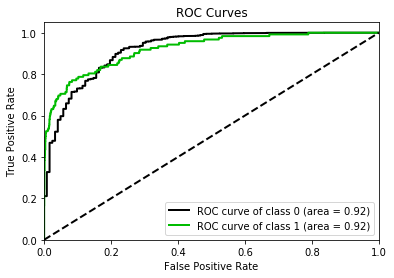

In [60]:
plot_roc(y_test,y_predicted_lgbm, plot_micro = False, plot_macro= False);

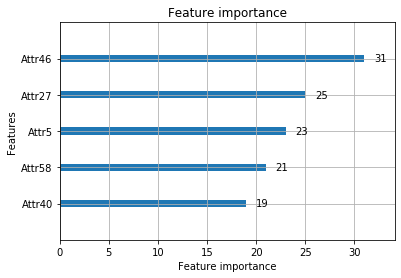

In [61]:
lgb.plot_importance(lgbm.best_estimator_, max_num_features=5);

In [62]:
lgbm.best_estimator_.feature_importances_

array([ 2,  0,  4,  6, 23,  6,  2,  0,  9,  1,  7,  1, 15,  0,  2,  3,  1,
        0,  5,  6, 17,  6,  4, 16,  6,  6, 25,  9, 13,  6,  2,  7,  6, 17,
        8,  4,  8,  7,  8, 19, 11,  7,  2,  5,  6, 31, 16,  2, 10,  4,  0,
        2,  5, 10,  6,  9,  7, 21,  1,  8,  4,  3,  0,  9])

## CatBoost

In [63]:
from catboost import CatBoostClassifier

In [64]:
model_cat = CatBoostClassifier()

¿Es necesario normalizar los features antes de aplicar CatBoost?

Con CatBoost los resultados sin hacer una búsqueda de hiperparámetros ya son... ¡excelentes!

In [65]:
model_cat.fit(X_train, y_train)

Learning rate set to 0.030047
0:	learn: 0.6441654	total: 189ms	remaining: 3m 8s
1:	learn: 0.6052752	total: 324ms	remaining: 2m 41s
2:	learn: 0.5696123	total: 494ms	remaining: 2m 44s
3:	learn: 0.5280256	total: 763ms	remaining: 3m 10s
4:	learn: 0.4959018	total: 989ms	remaining: 3m 16s
5:	learn: 0.4647626	total: 1.15s	remaining: 3m 10s
6:	learn: 0.4404592	total: 1.36s	remaining: 3m 12s
7:	learn: 0.4178507	total: 1.53s	remaining: 3m 10s
8:	learn: 0.3971200	total: 1.72s	remaining: 3m 9s
9:	learn: 0.3779349	total: 1.88s	remaining: 3m 5s
10:	learn: 0.3607403	total: 2.04s	remaining: 3m 3s
11:	learn: 0.3452548	total: 2.21s	remaining: 3m 1s
12:	learn: 0.3302534	total: 2.41s	remaining: 3m 3s
13:	learn: 0.3177499	total: 2.58s	remaining: 3m 1s
14:	learn: 0.3034607	total: 2.79s	remaining: 3m 3s
15:	learn: 0.2926017	total: 2.96s	remaining: 3m 2s
16:	learn: 0.2824187	total: 3.11s	remaining: 2m 59s
17:	learn: 0.2718365	total: 3.27s	remaining: 2m 58s
18:	learn: 0.2587900	total: 3.44s	remaining: 2m 57s
1

158:	learn: 0.0961938	total: 24.7s	remaining: 2m 10s
159:	learn: 0.0960540	total: 24.9s	remaining: 2m 10s
160:	learn: 0.0959477	total: 25s	remaining: 2m 10s
161:	learn: 0.0958442	total: 25.1s	remaining: 2m 10s
162:	learn: 0.0956383	total: 25.3s	remaining: 2m 9s
163:	learn: 0.0954833	total: 25.4s	remaining: 2m 9s
164:	learn: 0.0954414	total: 25.5s	remaining: 2m 9s
165:	learn: 0.0951979	total: 25.7s	remaining: 2m 8s
166:	learn: 0.0950483	total: 25.8s	remaining: 2m 8s
167:	learn: 0.0947373	total: 25.9s	remaining: 2m 8s
168:	learn: 0.0946069	total: 26.1s	remaining: 2m 8s
169:	learn: 0.0944636	total: 26.2s	remaining: 2m 7s
170:	learn: 0.0941749	total: 26.3s	remaining: 2m 7s
171:	learn: 0.0939901	total: 26.5s	remaining: 2m 7s
172:	learn: 0.0938597	total: 26.6s	remaining: 2m 7s
173:	learn: 0.0937148	total: 26.7s	remaining: 2m 6s
174:	learn: 0.0935963	total: 26.9s	remaining: 2m 6s
175:	learn: 0.0934823	total: 27s	remaining: 2m 6s
176:	learn: 0.0933810	total: 27.2s	remaining: 2m 6s
177:	learn: 

315:	learn: 0.0784710	total: 45.7s	remaining: 1m 38s
316:	learn: 0.0784311	total: 45.8s	remaining: 1m 38s
317:	learn: 0.0784054	total: 46s	remaining: 1m 38s
318:	learn: 0.0782244	total: 46.1s	remaining: 1m 38s
319:	learn: 0.0782021	total: 46.2s	remaining: 1m 38s
320:	learn: 0.0780759	total: 46.3s	remaining: 1m 37s
321:	learn: 0.0777473	total: 46.4s	remaining: 1m 37s
322:	learn: 0.0776505	total: 46.6s	remaining: 1m 37s
323:	learn: 0.0775816	total: 46.7s	remaining: 1m 37s
324:	learn: 0.0775271	total: 46.8s	remaining: 1m 37s
325:	learn: 0.0774535	total: 47s	remaining: 1m 37s
326:	learn: 0.0773589	total: 47.1s	remaining: 1m 36s
327:	learn: 0.0773241	total: 47.3s	remaining: 1m 36s
328:	learn: 0.0772614	total: 47.4s	remaining: 1m 36s
329:	learn: 0.0772417	total: 47.5s	remaining: 1m 36s
330:	learn: 0.0771558	total: 47.7s	remaining: 1m 36s
331:	learn: 0.0770484	total: 47.8s	remaining: 1m 36s
332:	learn: 0.0769200	total: 47.9s	remaining: 1m 35s
333:	learn: 0.0768454	total: 48s	remaining: 1m 35s

472:	learn: 0.0664421	total: 1m 8s	remaining: 1m 15s
473:	learn: 0.0663623	total: 1m 8s	remaining: 1m 15s
474:	learn: 0.0662975	total: 1m 8s	remaining: 1m 15s
475:	learn: 0.0661750	total: 1m 8s	remaining: 1m 15s
476:	learn: 0.0661544	total: 1m 8s	remaining: 1m 15s
477:	learn: 0.0661374	total: 1m 8s	remaining: 1m 14s
478:	learn: 0.0659444	total: 1m 8s	remaining: 1m 14s
479:	learn: 0.0659208	total: 1m 8s	remaining: 1m 14s
480:	learn: 0.0658984	total: 1m 9s	remaining: 1m 14s
481:	learn: 0.0658127	total: 1m 9s	remaining: 1m 14s
482:	learn: 0.0657517	total: 1m 9s	remaining: 1m 14s
483:	learn: 0.0656591	total: 1m 9s	remaining: 1m 14s
484:	learn: 0.0656374	total: 1m 9s	remaining: 1m 13s
485:	learn: 0.0655898	total: 1m 9s	remaining: 1m 13s
486:	learn: 0.0654424	total: 1m 9s	remaining: 1m 13s
487:	learn: 0.0654131	total: 1m 9s	remaining: 1m 13s
488:	learn: 0.0653625	total: 1m 10s	remaining: 1m 13s
489:	learn: 0.0653112	total: 1m 10s	remaining: 1m 13s
490:	learn: 0.0651472	total: 1m 10s	remainin

628:	learn: 0.0571218	total: 1m 28s	remaining: 52.1s
629:	learn: 0.0570970	total: 1m 28s	remaining: 51.9s
630:	learn: 0.0570303	total: 1m 28s	remaining: 51.8s
631:	learn: 0.0569235	total: 1m 28s	remaining: 51.6s
632:	learn: 0.0569113	total: 1m 28s	remaining: 51.5s
633:	learn: 0.0568671	total: 1m 28s	remaining: 51.3s
634:	learn: 0.0568184	total: 1m 28s	remaining: 51.1s
635:	learn: 0.0567064	total: 1m 29s	remaining: 51s
636:	learn: 0.0566574	total: 1m 29s	remaining: 50.8s
637:	learn: 0.0566403	total: 1m 29s	remaining: 50.7s
638:	learn: 0.0566148	total: 1m 29s	remaining: 50.5s
639:	learn: 0.0565830	total: 1m 29s	remaining: 50.4s
640:	learn: 0.0564635	total: 1m 29s	remaining: 50.2s
641:	learn: 0.0564374	total: 1m 29s	remaining: 50.1s
642:	learn: 0.0563962	total: 1m 29s	remaining: 49.9s
643:	learn: 0.0563388	total: 1m 30s	remaining: 49.8s
644:	learn: 0.0563105	total: 1m 30s	remaining: 49.6s
645:	learn: 0.0562603	total: 1m 30s	remaining: 49.5s
646:	learn: 0.0562371	total: 1m 30s	remaining: 4

784:	learn: 0.0508073	total: 1m 46s	remaining: 29.2s
785:	learn: 0.0507864	total: 1m 46s	remaining: 29.1s
786:	learn: 0.0507824	total: 1m 46s	remaining: 28.9s
787:	learn: 0.0507570	total: 1m 47s	remaining: 28.8s
788:	learn: 0.0507173	total: 1m 47s	remaining: 28.7s
789:	learn: 0.0506959	total: 1m 47s	remaining: 28.5s
790:	learn: 0.0506416	total: 1m 47s	remaining: 28.4s
791:	learn: 0.0506351	total: 1m 47s	remaining: 28.2s
792:	learn: 0.0505998	total: 1m 47s	remaining: 28.1s
793:	learn: 0.0505686	total: 1m 47s	remaining: 27.9s
794:	learn: 0.0505061	total: 1m 47s	remaining: 27.8s
795:	learn: 0.0503856	total: 1m 47s	remaining: 27.7s
796:	learn: 0.0503327	total: 1m 48s	remaining: 27.5s
797:	learn: 0.0503186	total: 1m 48s	remaining: 27.4s
798:	learn: 0.0502882	total: 1m 48s	remaining: 27.2s
799:	learn: 0.0502833	total: 1m 48s	remaining: 27.1s
800:	learn: 0.0502443	total: 1m 48s	remaining: 27s
801:	learn: 0.0502159	total: 1m 48s	remaining: 26.8s
802:	learn: 0.0502134	total: 1m 48s	remaining: 2

941:	learn: 0.0455528	total: 2m 6s	remaining: 7.82s
942:	learn: 0.0454624	total: 2m 7s	remaining: 7.68s
943:	learn: 0.0454605	total: 2m 7s	remaining: 7.55s
944:	learn: 0.0454318	total: 2m 7s	remaining: 7.41s
945:	learn: 0.0454262	total: 2m 7s	remaining: 7.28s
946:	learn: 0.0454121	total: 2m 7s	remaining: 7.14s
947:	learn: 0.0453809	total: 2m 7s	remaining: 7.01s
948:	learn: 0.0453707	total: 2m 7s	remaining: 6.87s
949:	learn: 0.0453520	total: 2m 8s	remaining: 6.74s
950:	learn: 0.0453117	total: 2m 8s	remaining: 6.61s
951:	learn: 0.0453032	total: 2m 8s	remaining: 6.47s
952:	learn: 0.0452944	total: 2m 8s	remaining: 6.34s
953:	learn: 0.0452909	total: 2m 8s	remaining: 6.21s
954:	learn: 0.0452683	total: 2m 8s	remaining: 6.07s
955:	learn: 0.0452637	total: 2m 9s	remaining: 5.94s
956:	learn: 0.0452281	total: 2m 9s	remaining: 5.8s
957:	learn: 0.0451695	total: 2m 9s	remaining: 5.67s
958:	learn: 0.0451572	total: 2m 9s	remaining: 5.54s
959:	learn: 0.0451142	total: 2m 9s	remaining: 5.4s
960:	learn: 0.

In [66]:
y_predicted_cat = model_cat.predict_proba(X_test)

In [67]:
cat_auc = roc_auc_score(y_test,y_predicted_cat[:,1])
print("El valor del AUC es: ", cat_auc)

El valor del AUC es:  0.944439716126329


La lista de hiperparámetros se puede consultar <a = "https://tech.yandex.com/catboost/doc/dg/concepts/python-reference_parameters-list-docpage/"> aquí </a>

## Conclusiones

In [68]:
print("Los resultados finales fueron:\n - AUC de knn:", knn_auc," \n - AUC de RF:", rf_auc, " \n - AUC de XGBoost:", xgb_auc,
     "\n - AUC de LightGBM:", lgbm_auc, "\n - AUC de CatBoost:", cat_auc)

Los resultados finales fueron:
 - AUC de knn: 0.6136149374116169  
 - AUC de RF: 0.7861749070339914  
 - AUC de XGBoost: 0.9201081548211386 
 - AUC de LightGBM: 0.921368433457288 
 - AUC de CatBoost: 0.944439716126329


Otros resultados finales fueron:
 - AUC de knn: 0.611448533827  
 - AUC de RF: 0.861997410428  
 - AUC de XGBoost: 0.917590322258 
 - AUC de LightGBM: 0.926237865292 
 - AUC de CatBoost: 0.929962720176


Otros resultados finales fueron:
 - AUC de knn: 0.637398382501  
 - AUC de RF: 0.860488951279  
 - AUC de XGBoost: 0.923338152308 
 - AUC de LightGBM: 0.941349941334 
 - AUC de CatBoost: 0.945510671583
